# Ejercicios Clase 2

1) Generere un array de 10 x 3 de números aleatorios (en el rango [0,1]). Por cada fila, encuentre el número más cercano a 0.5.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import math


aleatorios = np.random.random((10,3))
print('aleatorios generados')
print(aleatorios)

c = (aleatorios - 0.5)
print('diferencias a 0.5')
print(c)

c = abs(c)
print('valor abs')
print(c)


maximos = c.max(axis=0)
print(maximos)
print('Los valores mas cercanos a cero estan en')
for i in range (0,3):
    indices = np.where(c == maximos[i])

    print(indices)

2) Sobre la imagen del corte tomográfico propocionada, genere una máscara que permita que solo sean visibles los píxeles dentro de un círculo de 100 píxeles de radio, centrado en la imagen. Aplique la máscara a la imagen original y grafique el histograma de la imagen resultante.

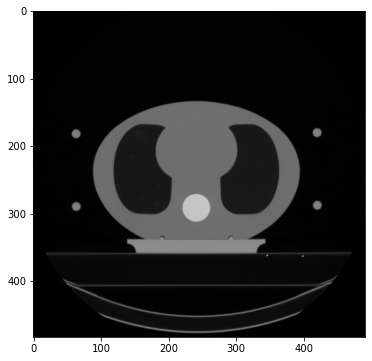

In [1]:
import matplotlib.pyplot as plt
import numpy as np

I = plt.imread('./cirs_slice.png')[...,0]


plt.figure(figsize = (6,6))
plt.imshow(I, cmap = 'gray')
plt.show()


In [6]:
plt.figure()
plt.hist(I.ravel(), bins=100, normed=True)       # matplotlib version (plot)
plt.show()

SyntaxError: positional argument follows keyword argument (<ipython-input-6-8c3e48720122>, line 2)

tamaño de la imagen pixeles
483 491
centro de la imagen en
242 246


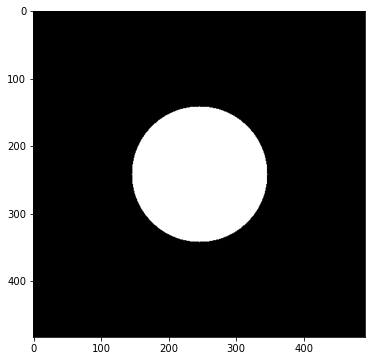

In [3]:
#Creamos una mascara 
Mask = np.zeros(I.shape)
print('tamaño de la imagen pixeles')
xmax, ymax=I.shape
print(xmax, ymax)
#centro sera el punto medio de la imagen
xcent = round(xmax/2)
ycent = round(ymax/2)
print('centro de la imagen en')
print(xcent, ycent)
#un circulo de 100 pixeles de radio
for i in range(xmax):
    for j in range(ymax):
        if (i-xcent)**2 + (j-ycent)**2 <= 100**2:
            Mask[i,j] = 1
            
plt.figure(figsize = (6,6))
plt.imshow(Mask, cmap = 'gray')
plt.show()


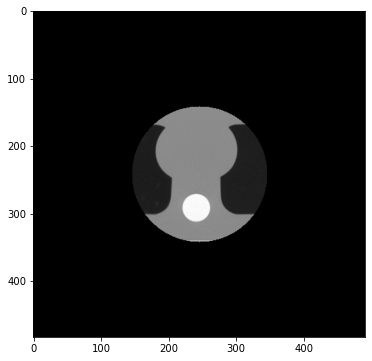

AttributeError: 'Rectangle' object has no property 'normed'

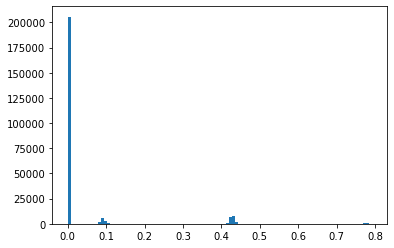

In [4]:
#aplicamos la mascara, mostramos la imagen y generamos su histograma
NI = I*Mask
plt.figure(figsize = (6,6))
plt.imshow(NI, cmap = 'gray')
plt.show()

plt.figure()
plt.hist(NI.ravel(), bins=100, normed=1)       # matplotlib version (plot)
plt.show()


3) Suponga que tenemos una grilla de 101x101 puntos en un plano, formando un arreglo cuadrado. Las coordenadas de estos puntos van de *-10 a 10 cm* en la dirección *x* y de *-10 a 10 cm* en la dirección *y* (esto produce que el punto central de la grilla tenga coordenadas *x=0, y=0*). Suponiendo que el plano donde está contenida la grilla posee coordenada z = 100 cm, calcule la distancia de todos los puntos al origen.

Ayuda: vea la documentación de la función "meshgrid"

In [7]:
import numpy as np

coord=np.arange(-10,11)
print(coord.shape)

x,y=np.meshgrid(coord,coord)
#print(x)
#print(y)

z = np.sqrt(x**2 + y**2)
print(z)


(21,)
[[14.14213562 13.45362405 12.80624847 12.20655562 11.66190379 11.18033989
  10.77032961 10.44030651 10.19803903 10.04987562 10.         10.04987562
  10.19803903 10.44030651 10.77032961 11.18033989 11.66190379 12.20655562
  12.80624847 13.45362405 14.14213562]
 [13.45362405 12.72792206 12.04159458 11.40175425 10.81665383 10.29563014
   9.8488578   9.48683298  9.21954446  9.05538514  9.          9.05538514
   9.21954446  9.48683298  9.8488578  10.29563014 10.81665383 11.40175425
  12.04159458 12.72792206 13.45362405]
 [12.80624847 12.04159458 11.3137085  10.63014581 10.          9.43398113
   8.94427191  8.54400375  8.24621125  8.06225775  8.          8.06225775
   8.24621125  8.54400375  8.94427191  9.43398113 10.         10.63014581
  11.3137085  12.04159458 12.80624847]
 [12.20655562 11.40175425 10.63014581  9.89949494  9.21954446  8.60232527
   8.06225775  7.61577311  7.28010989  7.07106781  7.          7.07106781
   7.28010989  7.61577311  8.06225775  8.60232527  9.21954446  

3) Estimar el valor de  π  por Monte Carlo. Cree una función para calcular el valor de  π  usando el "método de cociente de áreas". Para ello:

Generar  N  puntos aleatorios en el plano dentro del cuadrado de lado unidad cuyo lado inferior va de  x=0  a  x=1 
Contar cuantos puntos caen dentro del (cuarto de) círculo unidad. Este número tiende a ser proporcional al área del círculo
La estimación de  π  será igual a cuatro veces el cociente de números dentro del círculo dividido por el número total de puntos. El argumento de su función, debe ser la cantidad  N  de puntos generados.

Utilizar la función con diferentes valores de  N . En particular, hacerlo para 20 valores de  N  equiespaciados logarítmicamente entre 100 y 10000. Para cada valor de  N  calcular la estimación de  π . Realizar un gráfico con el valor estimado como función del número  N .

[2.96, 3.1206896551724137, 3.1420612813370474, 3.1576, 3.1396932092381937, 3.1429194729000245, 3.143552, 3.141350946841696, 3.1414367768955818, 3.14167964]
El tiempo de ejecución del programa fue  324.5860710144043  segundos


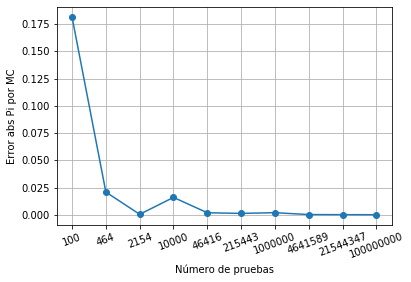

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from time import time


A=[]
pi=[]

N = np.logspace(2,8,num=10,endpoint=True)
N = np.around(N).astype(int) #numeros enteros

tiempo_inicial = time() 

#Calculamos los numeros random

for i in N:
    count = 0
    for j in range(i):
        x = np.random.random()
        y = np.random.random()
        dist = np.sqrt(x**2+y**2)
        if dist < 1:
            count = count +1 
    piexp=4*count/i   
    pi.append(piexp)
    A.append(np.absolute(piexp-np.pi))
    

print(pi)
tiempo_final = time() 
tiempo_ejecucion = tiempo_final - tiempo_inicial


print('El tiempo de ejecución del programa fue ',tiempo_ejecucion,' segundos')

#generamos la gráfica
plt.figure()
plt.plot(np.arange(1,11),A,'o-')
plt.xticks(range(1,N.size+1), N, rotation=20)
plt.xlabel('Número de pruebas')
plt.ylabel('Error abs Pi por MC')
plt.grid(True)
plt.show()


In [18]:
print(A)

[0.05840734641020706, 0.030821139513655282, 0.046893883086158716, 0.02320734641020694, 0.006553012086862875, 0.0022365727020798865, 0.002299346410207015, 0.0003994529926725221, 0.0001987406910362033, 6.209358979303303e-05]


[3.28, 3.146551724137931, 3.160631383472609, 3.1384, 3.141675284384695, 3.1405615406395193, 3.142708, 3.140817508831566, 3.1409852431359373, 3.14150944]
El tiempo de ejecución del programa fue  5.438988447189331  segundos


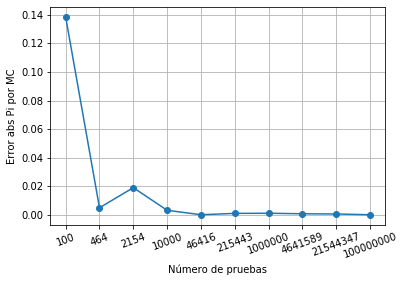

In [24]:
''' En el siguiente método se busca reducir el uso
bucles para resolver el problema. En el anterior 
ejercicio se usaron dos bucles for para la solucion.
En esta propuesta reduciremos el uso a un solo bucle 
FOR '''

import numpy as np
import matplotlib.pyplot as plt
from time import time



N = np.logspace(2,8,num=10,endpoint=True)
N = np.around(N).astype(int)
A=[]
pis=[]

tiempo_inicial = time() 



for i in N:
    a = np.random.random((i,2))
    z=np.sqrt(a[:,0]**2+a[:,1]**2)
    a_sc1=z<=1
    a_sc=np.sum(a_sc1)
    pi = 4*a_sc/i
    pis.append(pi)
    A.append(np.absolute(pi-np.pi))
    
print(pis)    
tiempo_final = time() 
tiempo_ejecucion = tiempo_final - tiempo_inicial
print('El tiempo de ejecución del programa fue ',tiempo_ejecucion,' segundos')

#generamos la gráfica
plt.figure()
plt.plot(np.arange(1,11),A,'o-')
plt.xticks(range(1,N.size+1), N, rotation=20)
plt.xlabel('Número de pruebas')
plt.ylabel('Error abs Pi por MC')
plt.grid(True)
plt.show()





El tiempo de ejecución del programa fue  4.8591790199279785  segundos


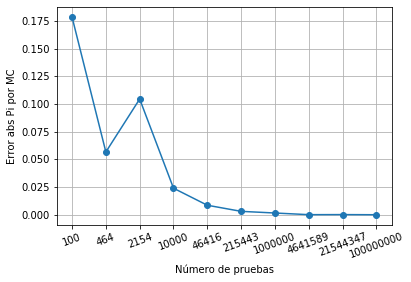

In [20]:
#En este nuevo ejericio se busca eliminar
#completamente el uso de bucles for
import numpy as np
import matplotlib.pyplot as plt
from time import time
#Obtenemos un vector que nos de el dato de N
#equiespaciado

N = np.logspace(2,8,num=10,endpoint=True)
N = np.around(N).astype(int)

#Se busca crear la matriz de datos x,y aleatorios
#juntamente con su distancia para el grupo más grande
#y seleccionar para el cálculo de subgrupos como un subconjunto del grande

tiempo_inicial = time() 
a=N[N.size-1]
rand=np.random.random((a,2))

#En última instancia nos interesa unicamente el vector distancias y si cumple 
#el criterio de ser mayor al radio (tipo boolean) 
z=np.sqrt(rand[:,0]**2+rand[:,1]**2)<=1
#Usaremos el indexado lógico que permite python

#generaremos una lista que contenga cada vector con N indices random
#Aqui recurriremos a una indexación del vector lógico de distancias 
#con un array de indices

error=[np.absolute((4/i)*z[np.arange(0,i)].sum()-np.pi) for i in N] #los bucles dentro de indices
                                                                    #son optimizados en python.

tiempo_final = time() 
tiempo_ejecucion = tiempo_final - tiempo_inicial
print('El tiempo de ejecución del programa fue ',tiempo_ejecucion,' segundos')

#generamos la gráfica
plt.figure()

plt.plot(np.arange(1,11),error,'o-')
plt.xticks(range(1,N.size+1), N, rotation=20)
plt.xlabel('Número de pruebas')
plt.ylabel('Error abs Pi por MC')
plt.grid(True)
plt.show()



In [25]:
pi1 =[(4/i)*z[np.arange(0,i)].sum() for i in N]
print(pi1)

[3.1651817982852686, 3.0810549240583107, 3.0670297130569746, 3.0600325901039644, 3.0615253850742814, 3.0572401767251933, 3.06028072262369, 3.0610632441219146, 3.061094119798994, 3.0607254653753704]
